1. Dijkstra's Algorithm -> Greedy Algorithm typically used to find the shortest path between the two nodes. This works on the basis of weighted graphs. Here the cost of travel is considered rather the path taken to reach the destination for a passenger.

Enter the start city: Boston
Enter the end city: SF


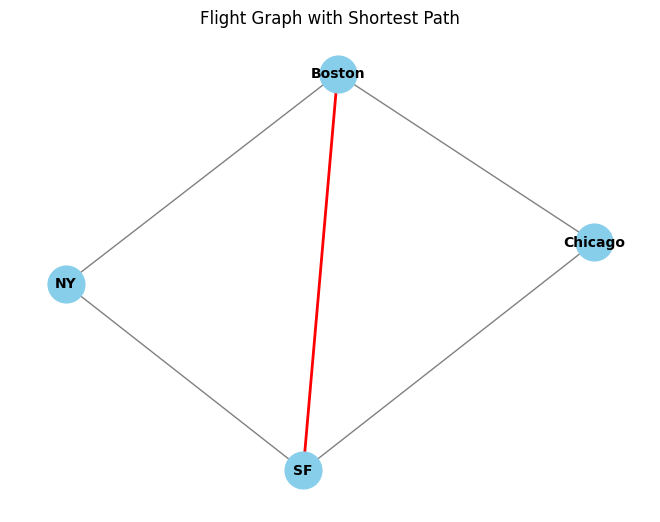


Shortest Path from Boston to SF: ['Boston', 'SF']
Total Cost: $50


In [ ]:
import networkx as nx # essential libraries to build graphs
import matplotlib.pyplot as plt # to display the graph

def dijkstraAlgorithm(graph, start_node, end_node):
    unvisitedNodes = set(graph.nodes())  # collects all the nodes in the graph and and converts them into a set. This ensures that the set keeps track of all the nodes that are not explored.
    shortestPath = {}
    previousNodes = {}

    for node in unvisitedNodes:
      shortestPath[node] = float('inf')  # the shortest path of each node is set to infinity
      previousNodes[node] = None # to store the previous paths that are shortest to the current path. Initially it is empty implies None

    shortestPath[start_node] = 0 # to set up the distance from the starting node and initializing it to 0

    priorityQueue = [(0, start_node)]  # Queue DS to ensure that the node with the shortest node distance is selected during each iteration

    while priorityQueue:
        current_distance, current_node = min(priorityQueue)  # setting the minimum distance from the priority queue to the current node
        priorityQueue.remove((current_distance, current_node)) # the visited is not re-visited again

        for i in graph.neighbors(current_node):  # function based on the 'relaxation' method
            distance = current_distance + graph.get_edge_data(current_node, i).get('weight', 0)  # .get_edge_data() considers all the possible connecting nodes from the current node and if no weight on the edge it returns 0
            if distance < shortestPath[i]:
                shortestPath[i] = distance
                previousNodes[i] = current_node
                priorityQueue.append((distance, i))

    # Reconstruct the path from end_node to start_node
    path = []
    current_node = end_node # reconstruction of the graph from the end node
    while current_node is not None:
        path.insert(0, current_node)
        current_node = previousNodes[current_node]

    return path, shortestPath[end_node]

# Driver code
flightsGraph = nx.Graph()  # representation of an undirected graph. Here 'weight' is considered as the cost factor for the flight prices
flightsGraph.add_edge('Boston', 'SF', weight=50) # .add_edge is to add new edges to the existing graph
flightsGraph.add_edge('Boston', 'Chicago', weight=30)
flightsGraph.add_edge('Chicago', 'SF', weight=20)
flightsGraph.add_edge('Boston', 'NY', weight=25)
flightsGraph.add_edge('NY', 'SF', weight=35)

start_city = input("Enter the start city: ")
end_city = input("Enter the end city: ")

try:

    shortest_path, total_cost = dijkstraAlgorithm(flightsGraph, start_city, end_city)

   # plotting the graph
    pos = nx.spring_layout(flightsGraph)
    nx.draw(flightsGraph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', font_family='sans-serif')

    edge_colors = ['red' if (shortest_path[i], shortest_path[i+1]) in flightsGraph.edges() or (shortest_path[i+1], shortest_path[i]) in flightsGraph.edges() else 'gray' for i in range(len(shortest_path)-1)]
    nx.draw_networkx_edges(flightsGraph, pos, edgelist=[(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)], edge_color=edge_colors, width=2)

    plt.title('Flight Graph with Shortest Path')
    plt.show()

    print(f"\nShortest Path from {start_city} to {end_city}: {shortest_path}")
    print(f"Total Cost: ${total_cost}")
except nx.NetworkXError as e:
    print(f"Error: {e}")
except KeyError as e:
    print(f"Error: {e}")


2. Kruskal's Algorithm => Minimum Spanning Tree. The find the minimum number of flights to maintain full connectivity between the airports.

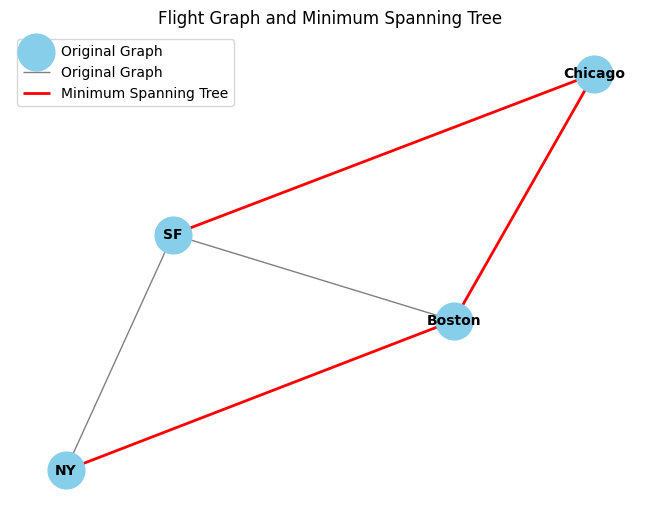

In [ ]:
import networkx as nx

def kruskalAlgorithm(graph):
    sortedEdges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])  # to sort the edges the graph in ascending order before building the tree

    disjoint_set = {}  # Initializing an empty dictionary

    for node in graph.nodes():
        disjoint_set[node] = {node}   # prevents the formation of cycles



    mstEdges = [] # Initializing minimum spanning tree

    # Kruskal's algorithm
    for edge in sortedEdges:
        u, v, weight = edge
        set_u = disjoint_set[u] # end point of first vertex
        set_v = disjoint_set[v] # end point of the other vertex


        if set_u != set_v:  # to check if the graph forms cycles
            mstEdges.append(edge) # Merge the sets and add the edge to the MST
            newSet = set_u.union(set_v)  #to merge the edges on checking the condition that they dont form circles
            for node in newSet:
                disjoint_set[node] = newSet

    mstGraph = nx.Graph()
    mstGraph.add_edges_from(mstEdges) # to directly create a graph from the list that is created

    return mstGraph

# driver code
flightsGraph = nx.Graph()
flightsGraph.add_edge('Boston', 'SF', weight=50)
flightsGraph.add_edge('Boston', 'Chicago', weight=30)
flightsGraph.add_edge('Chicago', 'SF', weight=20)
flightsGraph.add_edge('Boston', 'NY', weight=25)
flightsGraph.add_edge('NY', 'SF', weight=35)

mst = kruskalAlgorithm(flightsGraph)

# plotting the graph
pos = nx.spring_layout(flightsGraph)
nx.draw(flightsGraph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', font_family='sans-serif', label='Original Graph')
nx.draw_networkx_edges(mst, pos, edge_color='red', width=2, label='Minimum Spanning Tree')
plt.legend()
plt.title('Flight Graph and Minimum Spanning Tree')
plt.show()


3. Floyd Warshall's Algorithm -> Works on the concept of finding every possible shortest path that is available. The customer finds the cheapest possible way to reach to the destination

In [ ]:
import numpy as np  # using numpy as the algorithm works on the bases of 2D matrices

def floydWarshallAlgorithm(graph):
    airports = list(graph.keys()) # converting the distances from dictonary to key values and store it in a list
    numVertices = len(airports)

    airport_indices = {airport: i for i, airport in enumerate(airports)}  # Create a mapping from airport names to integer indices

    distances = np.full((numVertices, numVertices), float('inf')) # Initializing the distance matrix with infinity for unreachable pairs

    np.fill_diagonal(distances, 0)  # [i][i] element index is set to 0

    # Populate the distance matrix with initial distances
    for u in graph:
        for v, weight in graph[u].items():
            distances[airport_indices[u], airport_indices[v]] = weight

    # Floyd-Warshall algorithm
    for k in range(numVertices):
        for i in range(numVertices):
            for j in range(numVertices):

                if distances[i, j] > distances[i, k] + distances[k, j]: # If there is a shorter path from i to j through vertex k, update the distance
                    distances[i, j] = distances[i, k] + distances[k, j]

    return distances

# driver code
flightsGraph = {
    'Boston': {'SF': 50, 'Chicago': 30, 'NY': 25},
    'Chicago': {'SF': 20},
    'NY': {'SF': 35},
    'SF': {}
}

shortest_paths = floydWarshallAlgorithm(flightsGraph)

print("Shortest Paths Airport-to-Airport Distances:")
print(shortest_paths)


Shortest Paths Airport-to-Airport Distances:
[[ 0. 30. 25. 50.]
 [inf  0. inf 20.]
 [inf inf  0. 35.]
 [inf inf inf  0.]]


4. Bellman-Ford Algorithm => Dynamic based approach.

In [ ]:
class Graph:
    def __init__(self):
        self.edges = []
        self.vertices = set()

    def add_edge(self, start, end, weight):
        self.edges.append((start, end, weight))
        self.vertices.add(start)
        self.vertices.add(end)


def bellmanFordAlgorithm(graph, start):
    # Initializing the distances and predecessor dictionaries
    distance = {vertex: float('inf') for vertex in graph.vertices}
    predecessor = {vertex: None for vertex in graph.vertices}
    distance[start] = 0


    for _ in range(len(graph.vertices) - 1):  # Relaxing the edges repeatedly
        for edge in graph.edges:
            u, v, weight = edge
            if distance[u] + weight < distance[v]:
                distance[v] = distance[u] + weight
                predecessor[v] = u


    for edge in graph.edges:  # Checking for negative weight cycles, running the iterations
        u, v, weight = edge
        if distance[u] + weight < distance[v]:
            raise ValueError("Graph contains a negative weight cycle")

    return distance, predecessor


# Driver Code
flightsGraph = Graph()
flightsGraph.add_edge('Boston', 'SF', weight=50)
flightsGraph.add_edge('Boston', 'Chicago', weight=30)
flightsGraph.add_edge('Chicago', 'SF', weight=20)
flightsGraph.add_edge('Boston', 'NY', weight=25)
flightsGraph.add_edge('NY', 'SF', weight=35)

start_vertex = 'Boston'
shortest_distances, predecessors = bellmanFordAlgorithm(flightsGraph, start_vertex)

print("Shortest Distances from", start_vertex, "to each vertex:")
for vertex, dist in shortest_distances.items():
    print(f"To {vertex}: {dist} (via {predecessors[vertex]})")


Shortest Distances from Boston to each vertex:
To Boston: 0 (via None)
To NY: 25 (via Boston)
To SF: 50 (via Boston)
To Chicago: 30 (via Boston)
